In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('matmul.csv')
df = df[df['dynamic'] == False]
df.drop(['dynamic'], axis=1, inplace=True)

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,0.414051,0.027460,0.027423,0.998657,0.413495,15.078235
1,0,2,0.250289,0.013793,0.013715,0.994348,0.248875,18.146188
2,0,3,0.203959,0.009757,0.009181,0.940976,0.191920,20.903320
3,0,4,0.172404,0.007047,0.006917,0.981519,0.169218,24.463696
4,0,5,0.167762,0.006110,0.005561,0.910217,0.152700,27.458198
...,...,...,...,...,...,...,...,...
139,16,12,0.638490,0.017376,0.003376,0.194289,0.124052,36.744958
140,16,13,0.606747,0.016475,0.003061,0.185791,0.112728,36.827666
141,16,14,0.579637,0.015714,0.002863,0.182189,0.105604,36.886948
142,16,15,0.672440,0.017995,0.002918,0.162134,0.109025,37.368459


In [32]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,1.654290,1.990887,1.999514,1.004334,1.661459,0.830931
2,0,3,2.030073,2.814339,2.986856,1.061299,2.154515,0.721332
3,0,4,2.401633,3.896531,3.964568,1.017461,2.443567,0.616352
4,0,5,2.468088,4.494507,4.931212,1.097164,2.707897,0.549134
...,...,...,...,...,...,...,...,...
139,16,12,0.648485,1.580327,8.122967,5.140053,3.333247,0.410348
140,16,13,0.682411,1.666747,8.959048,5.375168,3.668075,0.409427
141,16,14,0.714328,1.747511,9.578842,5.481420,3.915532,0.408769
142,16,15,0.615744,1.526002,9.399367,6.159472,3.792660,0.403502


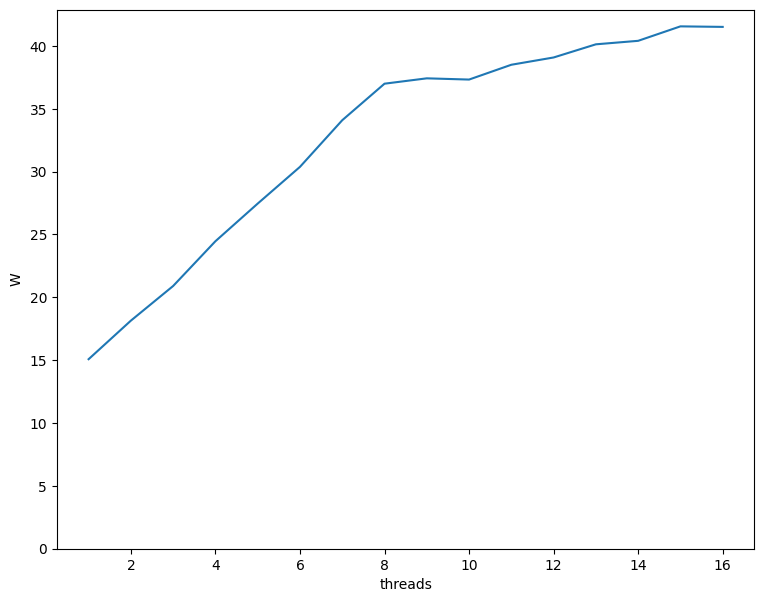

In [33]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

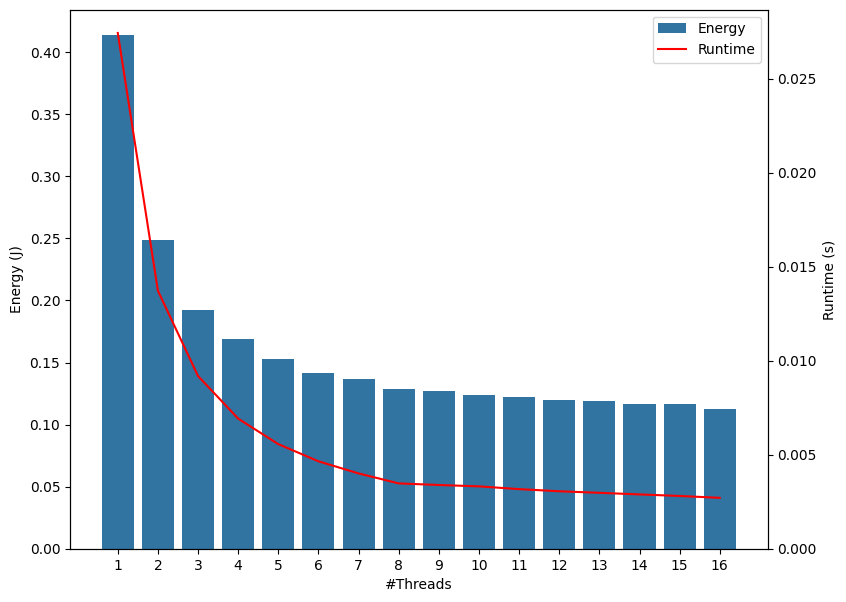

In [34]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

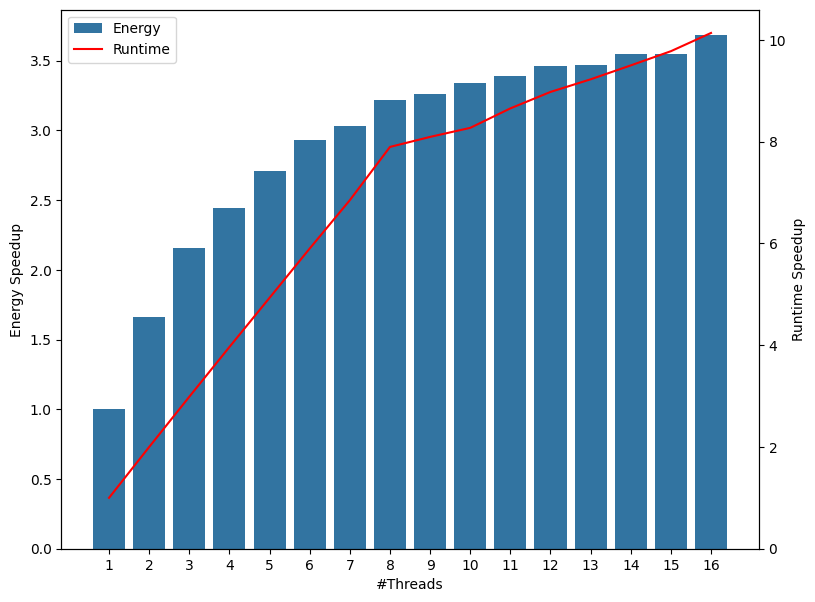

In [35]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [36]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 16 	 0.11834369
2 	 14 	 0.12957303
4 	 12 	 0.13932875
6 	 10 	 0.15234531
8 	 8 	 0.17207451
10 	 6 	 0.2220999
12 	 4 	 0.31599577
14 	 16 	 0.56842421
16 	 5 	 0.53489829


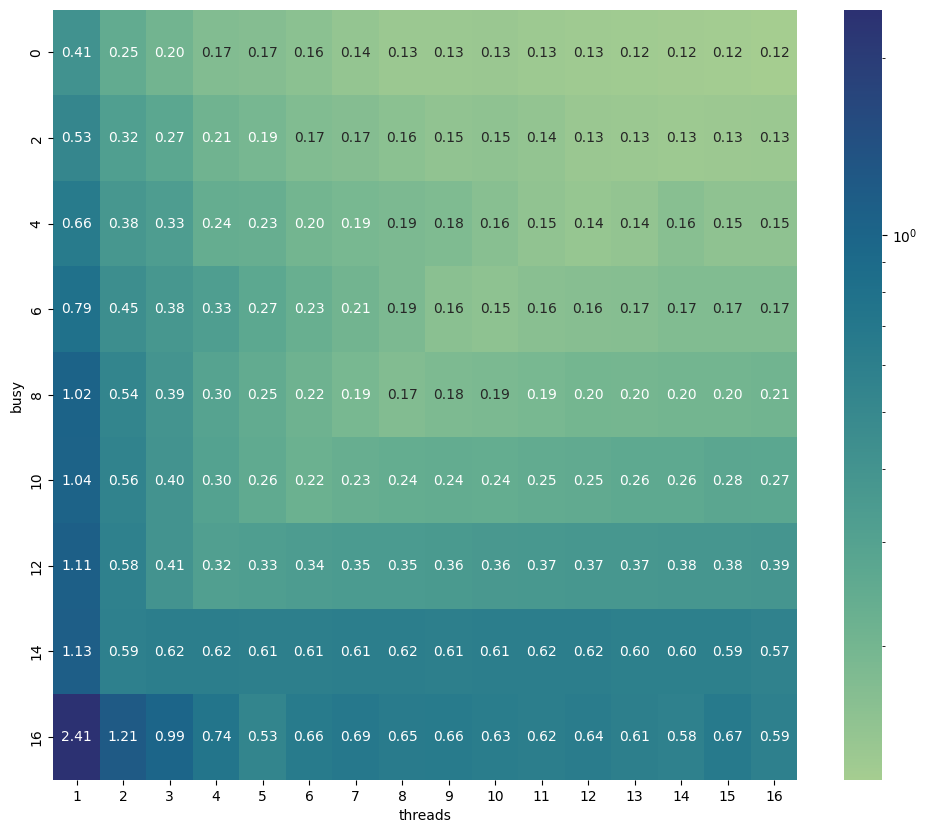

In [47]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(12,10))
df_pivot = df.pivot(index='busy', columns='threads', values='energy')
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap='crest', norm=LogNorm())
plt.show()

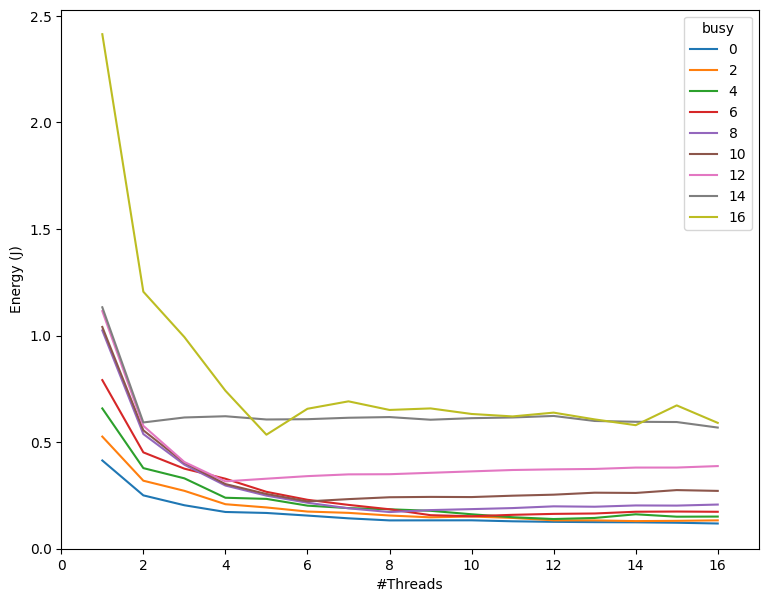

In [38]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()

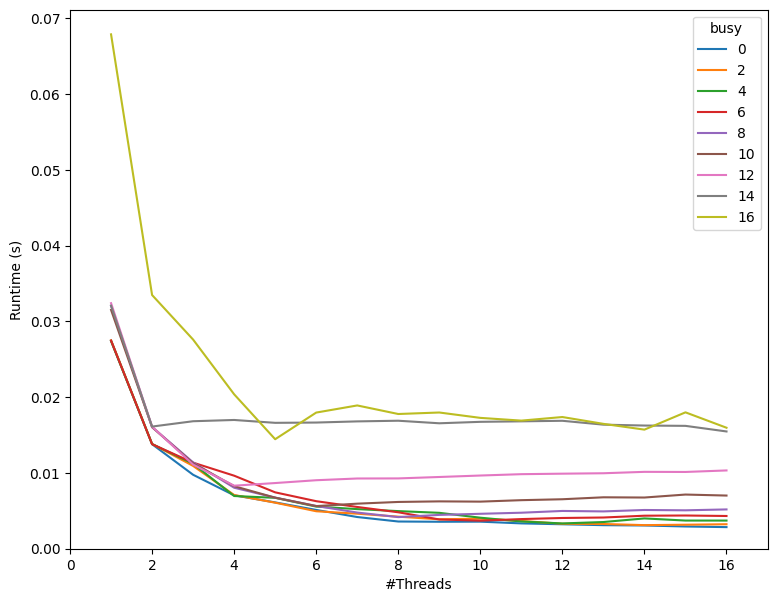

In [39]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()